In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score 
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('HR_DS.csv')

In [3]:
# Convert 'Attrition' column to binary
data['Attrition'] = data['Attrition'].map({'No': 0, 'Yes': 1})

In [4]:
# Label encode categorical columns
label_encoders = {}
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 
                       'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

for col in categorical_columns:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
    label_encoders[col] = encoder

In [5]:
# Split data into features and target
features = data.drop(['Attrition', 'Over18', 'StandardHours'], axis=1)
target = data['Attrition'].values

In [6]:
# Display target distribution
print(Counter(target))

Counter({0: 1233, 1: 237})


In [7]:
# Handle class imbalance using RandomOverSampler
oversampler = RandomOverSampler(random_state=99)
features_over, target_over = oversampler.fit_resample(features, target)
print(Counter(target_over))

Counter({1: 1233, 0: 1233})


In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_over, target_over, 
                                                    test_size=0.2, random_state=99)


<h1> LogisticRegression

In [9]:
# Train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Make predictions
predictions = logistic_model.predict(X_test)

In [11]:
# Display accuracy and confusion matrix
print('Accuracy Score -', accuracy_score(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)

Accuracy Score - 0.6255060728744939


In [12]:
# Performance Evaluation Metrics 
print("The accuracy is {:.2f}".format(accuracy_score(y_test, predictions)))
print("The balanced accuracy is {:.2f}".format(balanced_accuracy_score(y_test, predictions)))
print("The recall is {:.2f}".format(recall_score(y_test, predictions)))
print("The precision is {:.2f}".format(precision_score(y_test, predictions)))
print("The F1 Score is {:.2f}".format(f1_score(y_test, predictions)))
print("The AUC ROC Score is {:.2f}".format(roc_auc_score(y_test, predictions)))

The accuracy is 0.63
The balanced accuracy is 0.63
The recall is 0.65
The precision is 0.61
The F1 Score is 0.63
The AUC ROC Score is 0.63


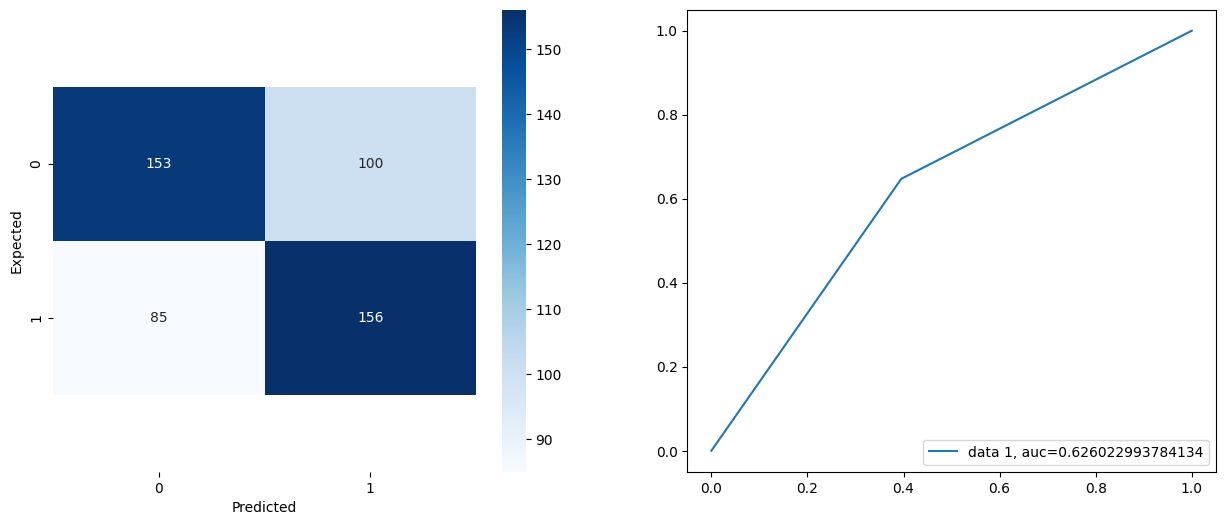

In [13]:
# Plot confusion matrix and ROC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Confusion matrix
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap='Blues', fmt='d', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Expected')
ax1.set_ylim(len(confusion)+0.5, -0.5)

# ROC curve
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, predictions)
auc_value = roc_auc_score(y_test, predictions)
ax2.plot(fpr, tpr, label=f'data 1, auc={auc_value}')
ax2.legend(loc=4)

plt.show()

<h1> RandomForestClassifier

In [14]:
# Train a RandomForest model
rf_model = RandomForestClassifier(random_state=99)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=99)

In [15]:
# Make predictions
predictions = rf_model.predict(X_test)

In [16]:
# Display accuracy and confusion matrix
print('Accuracy Score -', accuracy_score(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)

Accuracy Score - 0.97165991902834


In [17]:
# Performance Evaluation Metrics 
print("The accuracy is {:.2f}".format(accuracy_score(y_test, predictions)))
print("The balanced accuracy is {:.2f}".format(balanced_accuracy_score(y_test, predictions)))
print("The recall is {:.2f}".format(recall_score(y_test, predictions)))
print("The precision is {:.2f}".format(precision_score(y_test, predictions)))
print("The F1 Score is {:.2f}".format(f1_score(y_test, predictions)))
print("The AUC ROC Score is {:.2f}".format(roc_auc_score(y_test, predictions)))

The accuracy is 0.97
The balanced accuracy is 0.97
The recall is 0.99
The precision is 0.96
The F1 Score is 0.97
The AUC ROC Score is 0.97


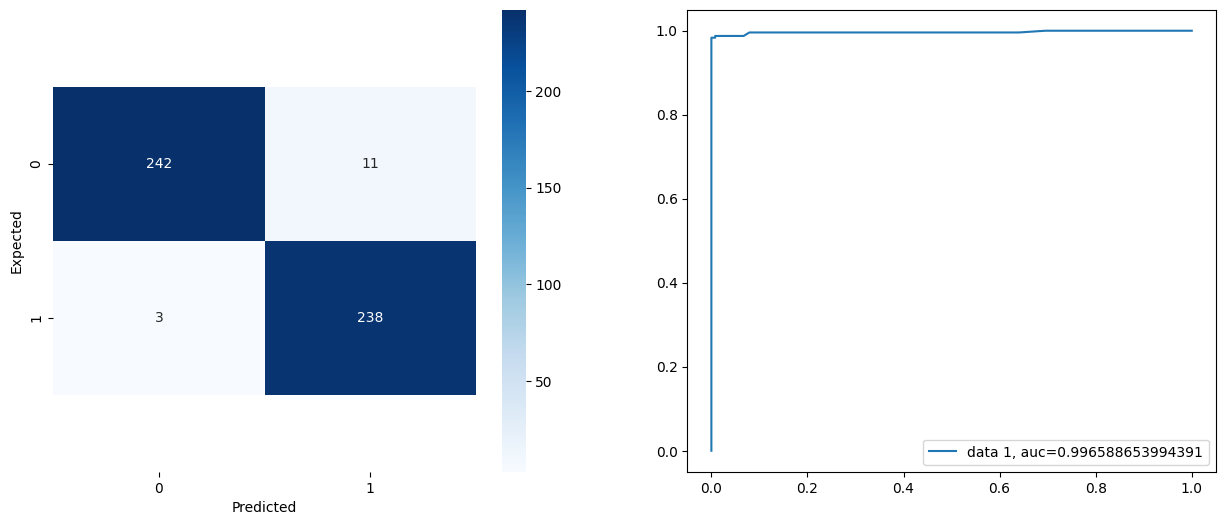

In [18]:
# Plot confusion matrix and ROC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Confusion matrix
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap='Blues', fmt='d', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Expected')
ax1.set_ylim(len(confusion)+0.5, -0.5)

# ROC curve
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_value = roc_auc_score(y_test, y_pred_proba)
ax2.plot(fpr, tpr, label=f'data 1, auc={auc_value}')
ax2.legend(loc=4)

plt.show()

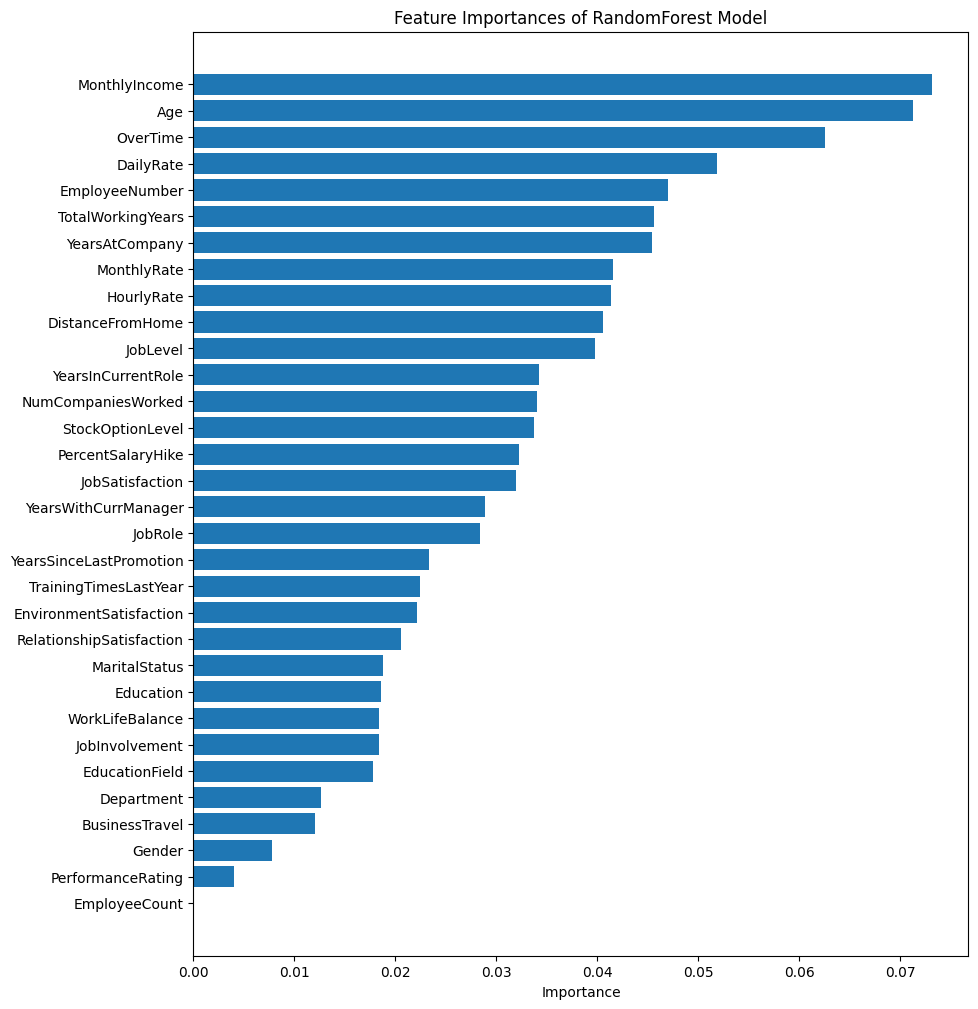

In [19]:
# Extract feature importances from the trained model
importances = rf_model.feature_importances_

# Get the feature names
feature_names = features_over.columns

# Sort the features by importance
sorted_idx = importances.argsort()

# Plot
plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances of RandomForest Model')
plt.show()

<h1> DecisionTree

In [20]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=99)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=99)

In [21]:
# Make predictions
predictions_dt = dt_model.predict(X_test)

In [22]:
# Display accuracy and confusion matrix
print('Accuracy Score -', accuracy_score(y_test, predictions_dt))
confusion = confusion_matrix(y_test, predictions_dt)

Accuracy Score - 0.9190283400809717


In [23]:
# Performance Evaluation Metrics 
print("The accuracy is {:.2f}".format(accuracy_score(y_test, predictions_dt)))
print("The balanced accuracy is {:.2f}".format(balanced_accuracy_score(y_test, predictions_dt)))
print("The recall is {:.2f}".format(recall_score(y_test, predictions_dt)))
print("The precision is {:.2f}".format(precision_score(y_test, predictions_dt)))
print("The F1 Score is {:.2f}".format(f1_score(y_test, predictions_dt)))
print("The AUC ROC Score is {:.2f}".format(roc_auc_score(y_test, predictions_dt)))

The accuracy is 0.92
The balanced accuracy is 0.92
The recall is 0.99
The precision is 0.87
The F1 Score is 0.92
The AUC ROC Score is 0.92


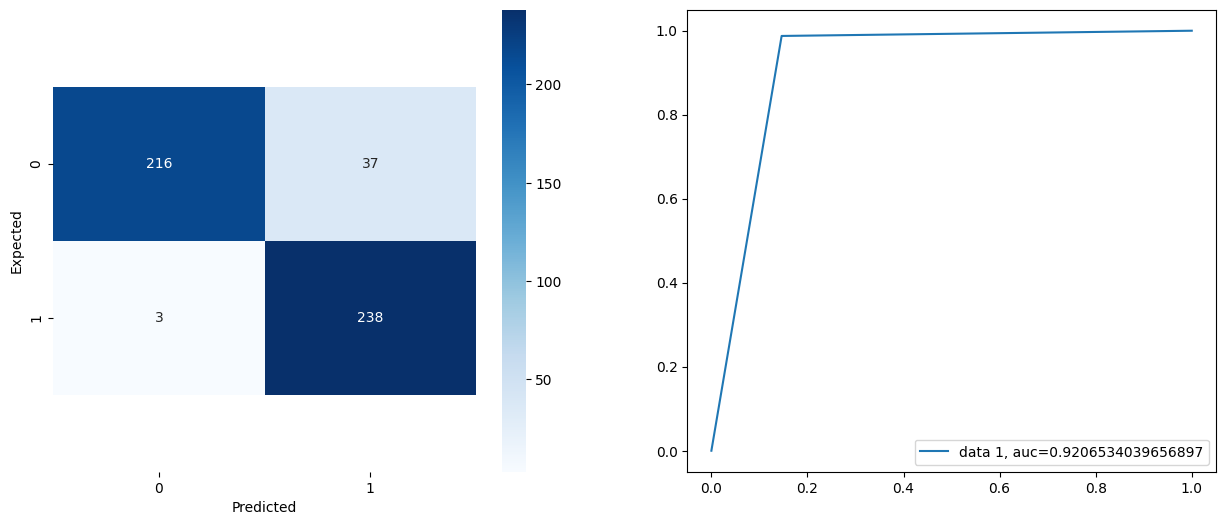

In [24]:
# Plot confusion matrix and ROC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Confusion matrix
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap='Blues', fmt='d', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Expected')
ax1.set_ylim(len(confusion)+0.5, -0.5)

# ROC curve
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_value = roc_auc_score(y_test, y_pred_proba)
ax2.plot(fpr, tpr, label=f'data 1, auc={auc_value}')
ax2.legend(loc=4)

plt.show()

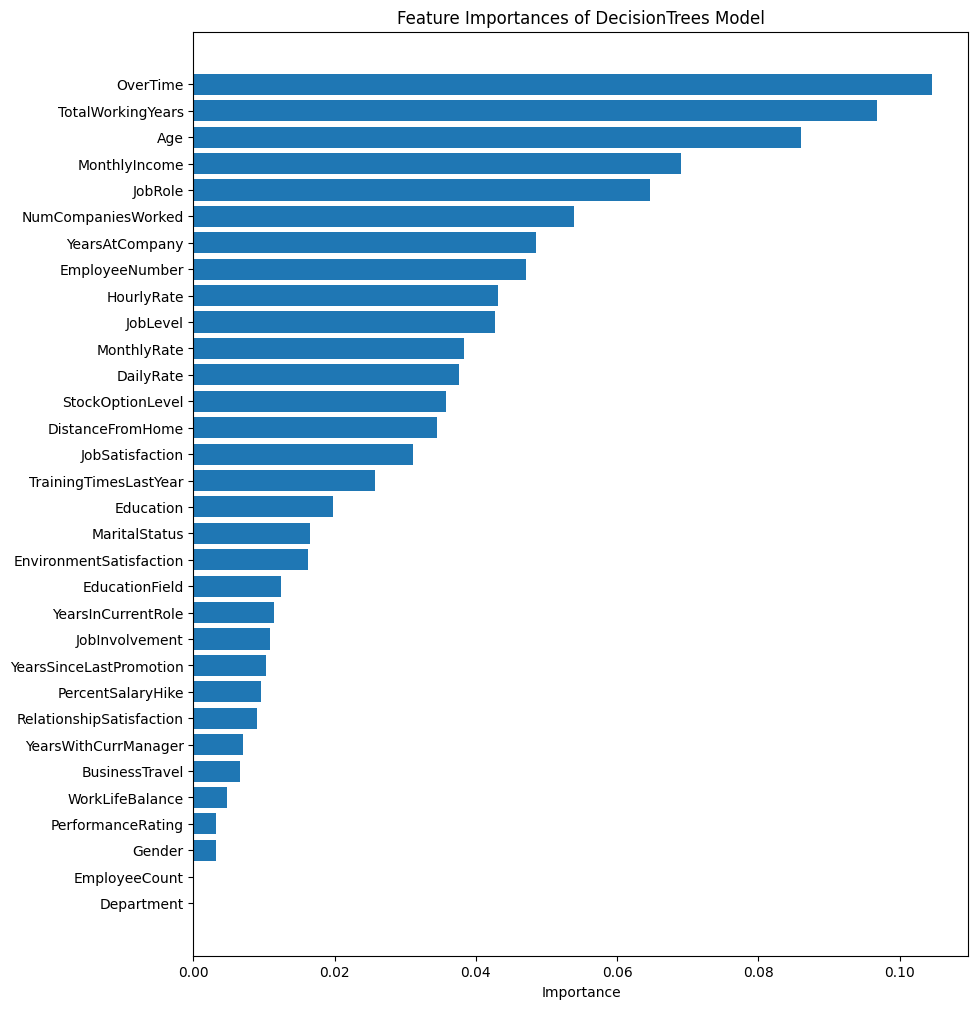

In [25]:
# Extract feature importances from the trained model
importances = dt_model.feature_importances_

# Get the feature names
feature_names = features_over.columns

# Sort the features by importance
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances of DecisionTrees Model')
plt.show()

<h1> Hyperparameter Tuning for DecisionTrees

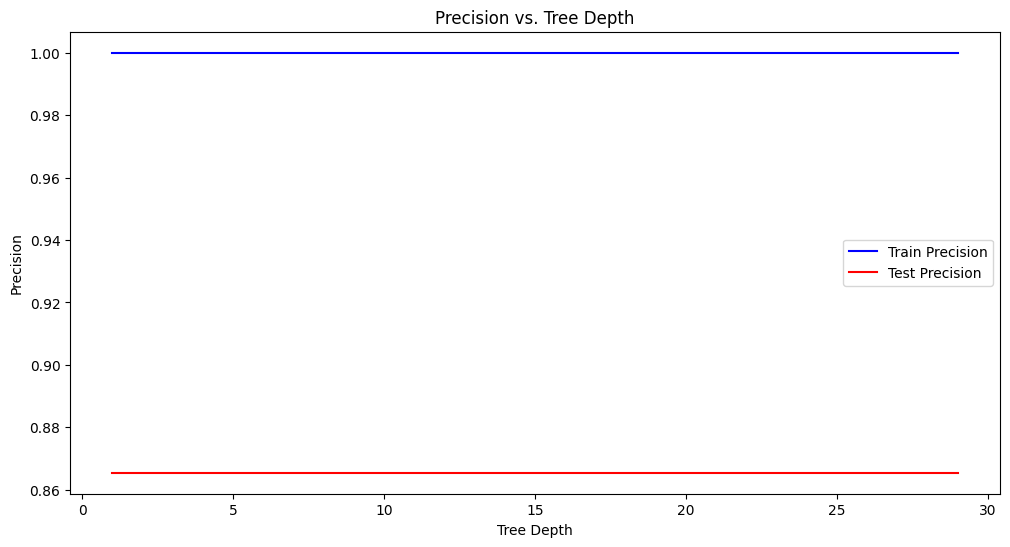

In [35]:
train_results = []
test_results = []

max_depths = list(range(1, 30))

for max_depth in max_depths:
    dt_model = DecisionTreeClassifier(random_state=99)
    dt_model.fit(X_train, y_train)
    
    train_pred = dt_model.predict(X_train)
    train_precision = precision_score(y_train, train_pred)
    train_results.append(train_precision)
    
    test_pred = dt_model.predict(X_test)
    test_precision = precision_score(y_test, test_pred)
    test_results.append(test_precision)

plt.figure(figsize=(12, 6))
plt.plot(max_depths, train_results, 'b', label='Train Precision')
plt.plot(max_depths, test_results, 'r', label='Test Precision')
plt.xlabel('Tree Depth')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision vs. Tree Depth')
plt.show()

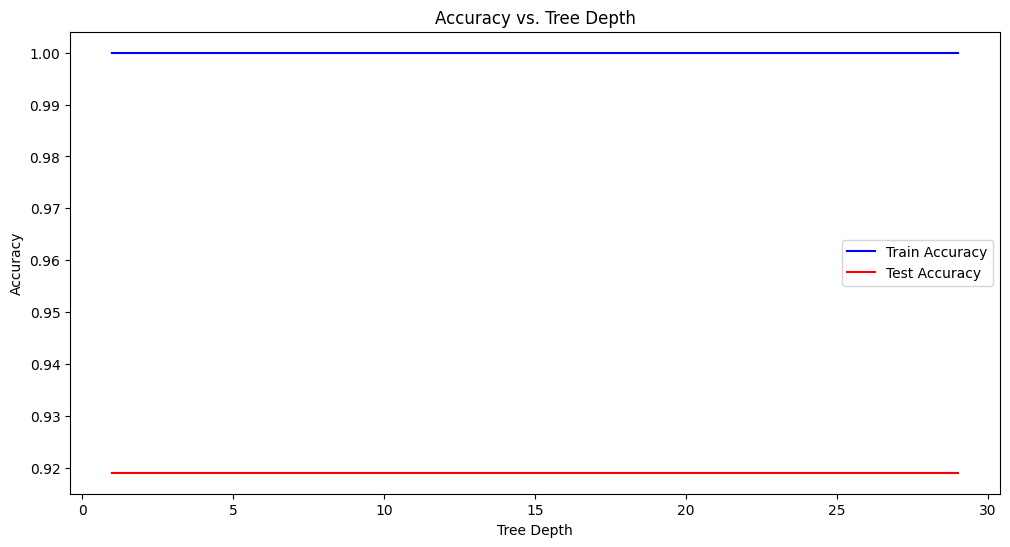

In [36]:
train_results = []
test_results = []

# Max depth values
max_depths = list(range(1, 30))

for max_depth in max_depths:
    dt_model = DecisionTreeClassifier(random_state=99)
    dt_model.fit(X_train, y_train)
    
    train_pred = dt_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_results.append(train_accuracy)
    
    test_pred = dt_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_results.append(test_accuracy)

plt.figure(figsize=(12, 6))
plt.plot(max_depths, train_results, 'b', label='Train Accuracy')
plt.plot(max_depths, test_results, 'r', label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Tree Depth')
plt.show()

In [42]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'splitter': ['best', 'random'],    # Strategy used to choose the split at each node
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'class_weight': [None, 'balanced']  # Weights associated with classes
}

#GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_dt = grid_search.best_estimator_

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] 

[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.1s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.2s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.1s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.1s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_fea

In [75]:
best_dt = DecisionTreeClassifier(class_weight= None, criterion= 'entropy', max_depth=12, max_features= None, min_samples_leaf= 1, min_samples_split= 2, splitter= 'random', random_state=99)

In [76]:
best_dt.fit(X_train, y_train)

# Predict using the best model
best_predictions = best_dt.predict(X_test)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("The accuracy is {:.2f}".format(accuracy_score(y_test, best_predictions)))
print("The balanced accuracy is {:.2f}".format(balanced_accuracy_score(y_test, best_predictions)))
print("The recall is {:.2f}".format(recall_score(y_test, best_predictions)))
print("The precision is {:.2f}".format(precision_score(y_test, best_predictions)))
print("The F1 Score is {:.2f}".format(f1_score(y_test, best_predictions)))
print("The AUC ROC Score is {:.2f}".format(roc_auc_score(y_test, best_predictions)))

Best parameters found:  {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
The accuracy is 0.89
The balanced accuracy is 0.90
The recall is 0.96
The precision is 0.84
The F1 Score is 0.90
The AUC ROC Score is 0.90


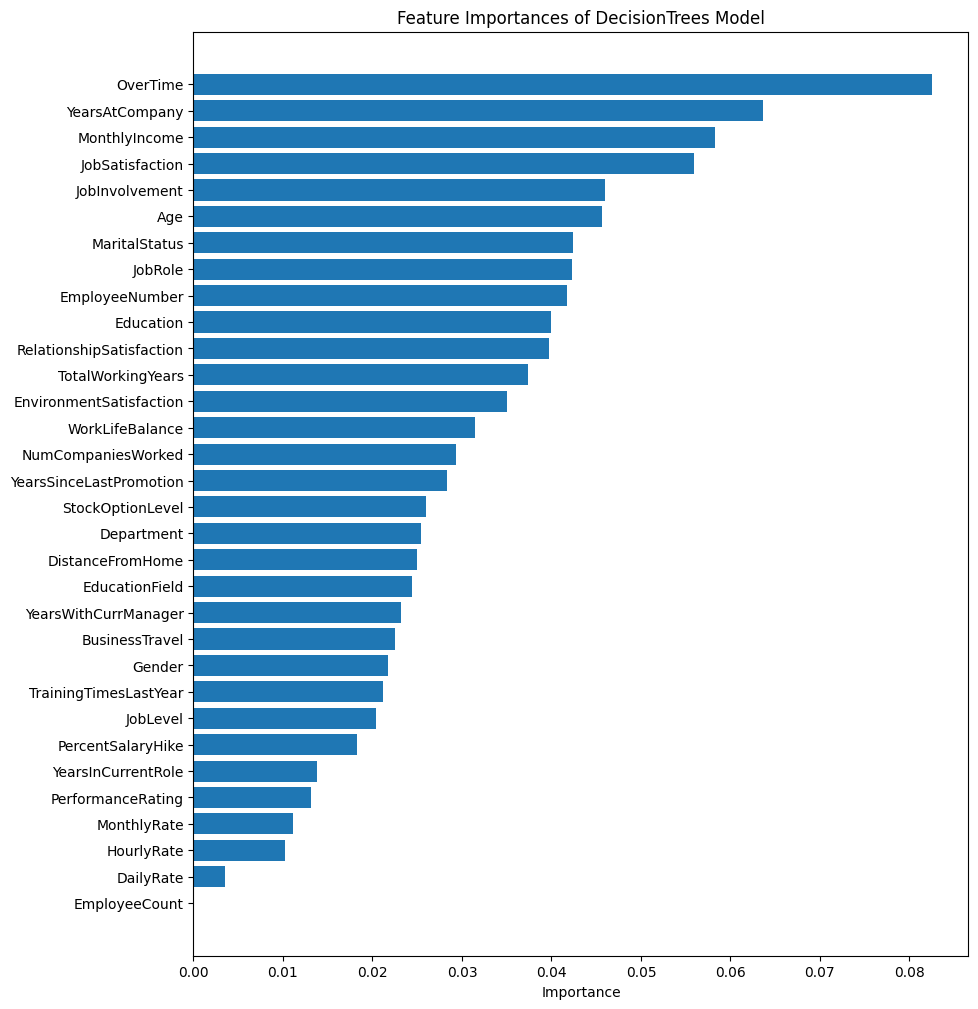

In [77]:
# Extract feature importances from the trained model
importances = best_dt.feature_importances_

# Get the feature names
feature_names = features_over.columns

# Sort the features by importance
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances of DecisionTrees Model')
plt.show()

In [78]:
# Save the best model to a file
joblib.dump(best_dt, 'DT_model.pkl')

['DT_model.pkl']

<h1> Decision Trees Visualization

In [79]:
from sklearn.tree import export_graphviz
import graphviz

# Export the tree to a dot format
dot_data = export_graphviz(best_dt, out_file=None, 
                           feature_names=features_over.columns,  
                           class_names=['Not Leaving', 'Leaving'],
                           filled=True, rounded=True,  
                           special_characters=True)  

# Visualize using graphviz
graph = graphviz.Source(dot_data)  
graph.view()


'Source.gv.pdf'

In [80]:
from sklearn.tree import _tree

def tree_to_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth, rules):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            rules.append(f"{indent}if {name} <= {threshold:.2f}:")
            recurse(tree_.children_left[node], depth + 1, rules)
            rules.append(f"{indent}else:  # if {name} > {threshold:.2f}")
            recurse(tree_.children_right[node], depth + 1, rules)
        else:
            rules.append(f"{indent}return Class {tree_.value[node].argmax()}")

    rules = []
    recurse(0, 1, rules)
    return "\n".join(rules)

# Extract rules from the decision tree
rules = tree_to_rules(best_dt, features_over.columns)
print(rules)

  if OverTime <= 0.12:
    if YearsAtCompany <= 2.87:
      if YearsSinceLastPromotion <= 1.99:
        if TotalWorkingYears <= 12.42:
          if Age <= 26.83:
            if StockOptionLevel <= 1.04:
              if BusinessTravel <= 0.29:
                if Education <= 1.74:
                  return Class 1
                else:  # if Education > 1.74
                  return Class 0
              else:  # if BusinessTravel > 0.29
                if WorkLifeBalance <= 2.29:
                  if YearsWithCurrManager <= 1.41:
                    return Class 1
                  else:  # if YearsWithCurrManager > 1.41
                    if RelationshipSatisfaction <= 2.04:
                      return Class 0
                    else:  # if RelationshipSatisfaction > 2.04
                      return Class 1
                else:  # if WorkLifeBalance > 2.29
                  if PercentSalaryHike <= 20.32:
                    if Gender <= 0.99:
                      if EducationFie

In [81]:
train_accuracy = best_dt.score(X_train, y_train)
test_accuracy = best_dt.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.98
Test Accuracy: 0.89


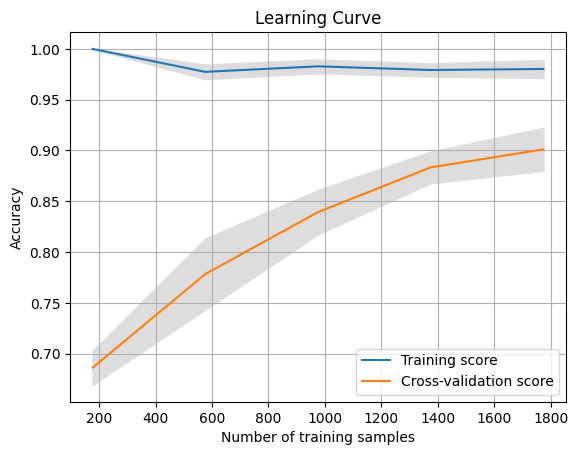

In [82]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(best_dt, X_train, y_train, cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

In [83]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_dt, X_train, y_train, cv=10)
print(f"Cross-Validation Mean Score: {np.mean(scores):.2f}")
print(f"Standard Deviation: {np.std(scores):.2f}")

Cross-Validation Mean Score: 0.90
Standard Deviation: 0.02


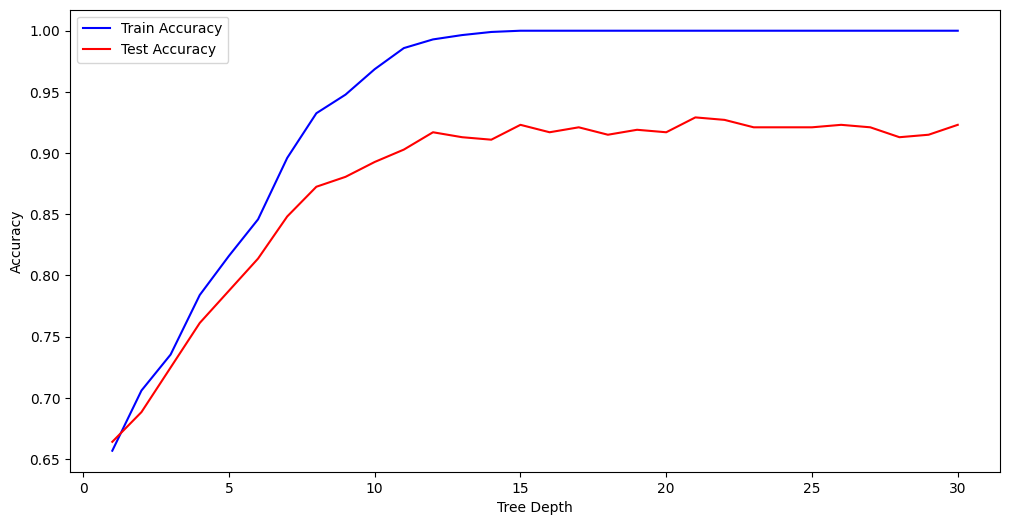

In [84]:
max_depths = np.linspace(1, 30, 30, endpoint=True).astype(int)  # Convert to integers
train_results = []
test_results = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_results.append(train_accuracy)
    
    test_pred = dt.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_results.append(test_accuracy)

plt.figure(figsize=(12, 6))
plt.plot(max_depths, train_results, 'b', label='Train Accuracy')
plt.plot(max_depths, test_results, 'r', label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<h1> TO BE DELETED

In [54]:
#Function to preprocess the data
def preprocess_data(data):
    data = data.copy() 
    
    if 'Attrition' in data.columns:
        data['Attrition'] = data['Attrition'].map({'No': 0, 'Yes': 1})
    
    label_encoders = {}
    categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 
                           'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

    for col in categorical_columns:
        if col in data.columns:
            encoder = LabelEncoder()
            data[col] = encoder.fit_transform(data[col])
            label_encoders[col] = encoder
        
    return data

In [55]:
#Function to select the best models
def select_best_models(data, model):
    data = preprocess_data(data) 
    skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)
    X = data.drop('Attrition', axis=1)
    y = data['Attrition'].copy()
    score_train, score_val = [], []
    
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index].copy(), X.iloc[val_index].copy()
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)
        score_train.append(accuracy_score(y_train, predictions_train))  
        score_val.append(accuracy_score(y_val, predictions_val))

    avg_train = round(np.mean(score_train), 3)
    avg_val = round(np.mean(score_val), 3)
    std_train = round(np.std(score_train), 2)
    std_val = round(np.std(score_val), 2)

    return avg_train, std_train, avg_val, std_val

In [56]:
#Function to show the results
def show_results(df, data, *args):
    count = 0
    for arg in args:
        avg_train, std_train, avg_val, std_val = select_best_models(data, arg)
        df.iloc[count] = str(avg_train) + '+/-' + str(std_train), str(avg_val) + '+/-' + str(std_val)
        count += 1
    return df

In [57]:
#Models for comparison
model_LR = LogisticRegression()
model_DT = DecisionTreeClassifier(random_state=99)
model_RF = RandomForestClassifier(random_state=99)

In [63]:
df_all = pd.DataFrame(columns=['Train', 'Validation'], index=['Logistic Regression', 'Decision Tree', 'Random Forest'])
all_data = pd.read_csv('HR_DS.csv')
show_results(df_all, all_data, model_LR, model_DT, model_RF)

Train    Validation
Logistic Regression  0.841+/-0.0  0.838+/-0.01
Decision Tree          1.0+/-0.0  0.778+/-0.03
Random Forest          1.0+/-0.0  0.852+/-0.01

<h1> Hyperparameter tuning

In [64]:
# Preprocess the data
df_comp = preprocess_data(all_data)
X_data = df_comp.drop('Attrition', axis=1)
y_data = df_comp['Attrition']

In [65]:
#Hyperparameter grid for Decision Tree
param_grid_DT = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [66]:
# Grid search for Decision Tree
grid_search_DT = GridSearchCV(DecisionTreeClassifier(random_state=99), param_grid_DT, scoring='accuracy', return_train_score=True, cv=5)
grid_search_DT.fit(X_data, y_data)
# Display best hyperparameters and their corresponding scores for Decision Tree
print("Decision Tree")
print("Best Hyperparameters: ", grid_search_DT.best_params_)
print("Best Score: ", grid_search_DT.best_score_)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=99),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='accuracy')

In [67]:
#Hyperparameter grid for Random Forest
param_grid_RF = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [68]:
# Grid search for Random Forest
grid_search_RF = GridSearchCV(RandomForestClassifier(random_state=99), param_grid_RF, scoring='accuracy', return_train_score=True, cv=5)
grid_search_RF.fit(X_data, y_data)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=99),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True, scoring='accuracy')

In [69]:
# Display best hyperparameters and their corresponding scores for Decision Tree
print("Decision Tree")
print("Best Hyperparameters: ", grid_search_DT.best_params_)
print("Best Score: ", grid_search_DT.best_score_)

Decision Tree
Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score:  0.814965986394558


In [70]:
# Display best hyperparameters and their corresponding scores for Random Forest
print("\nRandom Forest")
print("Best Hyperparameters: ", grid_search_RF.best_params_)
print("Best Score: ", grid_search_RF.best_score_)


Random Forest
Best Hyperparameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score:  0.8605442176870749


In [90]:
#Models for comparison
final_model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=2, min_samples_split=10, random_state=99)
final_model_RF = RandomForestClassifier(criterion='gini', max_depth=4, min_samples_leaf=1, min_samples_split=2,n_estimators=200, random_state=99)

In [91]:
df_final = pd.DataFrame(columns=['Train', 'Validation'], index=['Decision Tree', 'Random Forest'])
all_data = pd.read_csv('HR_DS.csv')
show_results(df_final, all_data, final_model_DT, final_model_RF)

Train    Validation
Decision Tree  0.839+/-0.0   0.839+/-0.0
Random Forest   0.86+/-0.0  0.846+/-0.01

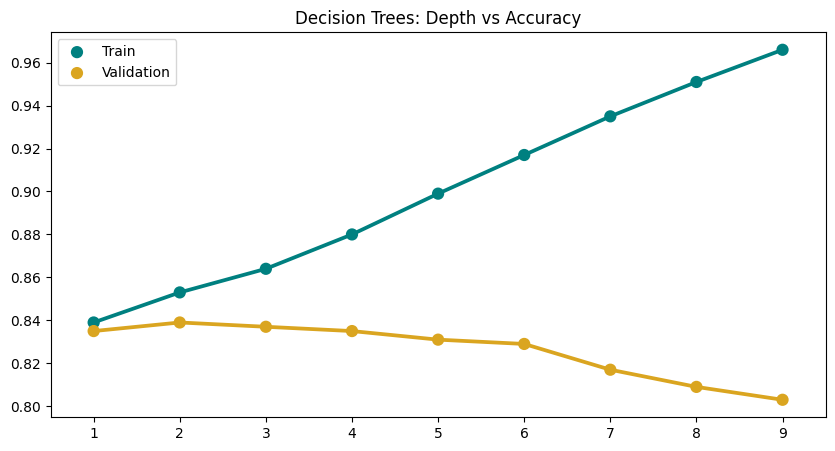

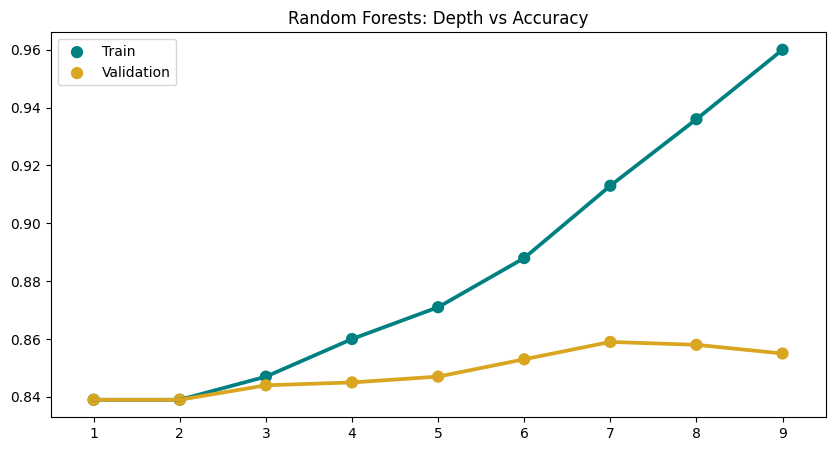

In [87]:
def point_plot(train, validation, values_try):
    sns.pointplot(x=values_try, y=train, color='teal', label='Train')
    sns.pointplot(x=values_try, y=validation, color='goldenrod', label='Validation')
    plt.legend()

def get_models_dt(data, values):
    models = dict()
    results_train, results_val = [], []
    
    for value in values:
        models['depth_' + str(value)] = DecisionTreeClassifier(max_depth=value, random_state=99)
        
    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        
    return results_train, results_val

def get_models_rf(data, values):
    models = dict()
    results_train, results_val = [], []
    
    for value in values:
        models['depth_' + str(value)] = RandomForestClassifier(max_depth=value, random_state=99)
        
    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        
    return results_train, results_val

# For Decision Trees
values_try_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9]
results_train_dt, results_val_dt = get_models_dt(all_data, values_try_depth)
plt.figure(figsize=(10, 5))
plt.title("Decision Trees: Depth vs Accuracy")
point_plot(results_train_dt, results_val_dt, values_try_depth)

# For Random Forests
values_try_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9]
results_train_rf, results_val_rf = get_models_rf(all_data, values_try_depth)
plt.figure(figsize=(10, 5))
plt.title("Random Forests: Depth vs Accuracy")
point_plot(results_train_rf, results_val_rf, values_try_depth)

plt.show()

In [78]:
param_grid_DT = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
    'max_features': [None, 'sqrt', 'log2']
}

# Preprocess the data
df_comp = preprocess_data(all_data)
X_data = df_comp.drop('Attrition', axis=1)
y_data = df_comp['Attrition']

# Grid search for Decision Tree
grid_search_DT = GridSearchCV(DecisionTreeClassifier(random_state=99), param_grid_DT, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
grid_search_DT.fit(X_data, y_data)

# Display best hyperparameters and their corresponding scores
print("Best Hyperparameters for Decision Tree:", grid_search_DT.best_params_)
print("Best Score for Decision Tree:", grid_search_DT.best_score_)

Fitting 5 folds for each of 8448 candidates, totalling 42240 fits
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; to

In [79]:
#Models for comparison
final_model_DT = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_features= 'sqrt', min_samples_leaf= 3, min_samples_split= 14, splitter= 'random')
final_model_RF = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2,n_estimators=200, random_state=99)

In [80]:
df_final = pd.DataFrame(columns=['Train', 'Validation'], index=['Decision Tree', 'Random Forest'])
all_data = pd.read_csv('HR_DS.csv')
show_results(df_final, all_data, final_model_DT, final_model_RF)

Train    Validation
Decision Tree  0.843+/-0.01  0.835+/-0.01
Random Forest     1.0+/-0.0  0.854+/-0.01